Nur nen test zu autoencodern

In [204]:
%config InlineBackend.figure_format = 'retina'

In [110]:
import tensorflow.keras as keras
from keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [196]:
# load images + class
images = pd.read_pickle('images_flatten.pkl').to_numpy()
image_size = images[0][1].size
image_shape = (217,335,3)
x_train,x_test = train_test_split(images[:, 1:],test_size=0.2) 
x_train = np.vstack(x_train[:, 0]).astype('float32') / 255.
x_test = np.vstack(x_test[:, 0]).astype('float32') / 255.

In [198]:
# very very simple 1 layer autoencoder
encoded_dimension = 10

input_img = keras.Input(shape=(image_size,))
encoded = layers.Dense(encoded_dimension,activation='relu')(input_img)
decoded = layers.Dense(image_size,activation='sigmoid')(encoded)

# model that maps input to guessed output
autoencoder = keras.Model(input_img,decoded)

# model that maps input to the "compressed" representation
encoder = keras.Model(input_img,encoded)

# model that maps representation to output
encoded_input = keras.Input(shape=(encoded_dimension,))
decoded_output = autoencoder.layers[-1](encoded_input) # same as layers.Dense(image_size,activation='sigmoid')(encoded_input) but retrived from other model
decoder = keras.Model(encoded_input,decoded_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

# train on data
autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_split=0.2
               )

# predict some images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.size)


Model: "model_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 218085)]          0         
                                                                 
 dense_47 (Dense)            (None, 10)                2180860   
                                                                 
 dense_48 (Dense)            (None, 218085)            2398935   
                                                                 
Total params: 4579795 (17.47 MB)
Trainable params: 4579795 (17.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
107/107 [==============================] - 3s 18ms/step - loss: 0.5792 - val_loss: 0.5661
Epoch 2/50
107/107 [==============================] - 2s 15ms/step - loss: 0.5632 - val_loss: 0.5657
Epoch 3/50
107/107 [==============================] - 2s 15ms/step - loss: 0.559

In [201]:
#print(decoded_imgs)
autoencoder.save('test_autoencoder.keras')

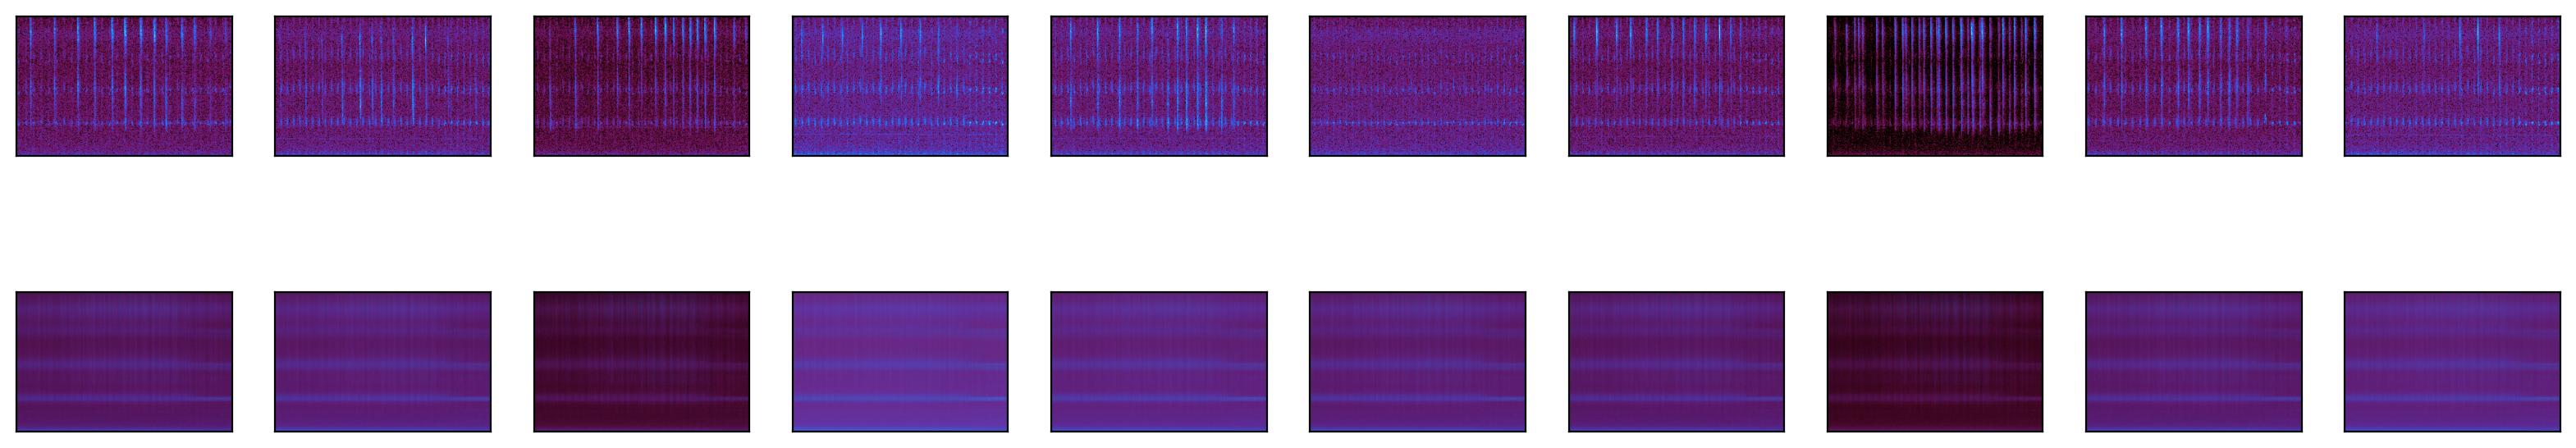

In [205]:
# display some of the images vs reconstruction
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(image_shape))
    #plt.color()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(image_shape))
    #plt.color()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("test_autoencoder_reconstruction.png",dpi=300)